In [ ]:
import pandas as pd
df = pd.read_csv('sales_data_sample.csv' , encoding = 'unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df_cleaned = df.dropna()
x = df_cleaned[['SALES','QUANTITYORDERED','PRICEEACH']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

/tmp/ipykernel_16634/1778194399.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K,intertia,'bo-',color = 'black')


Text(0, 0.5, 'Interita')

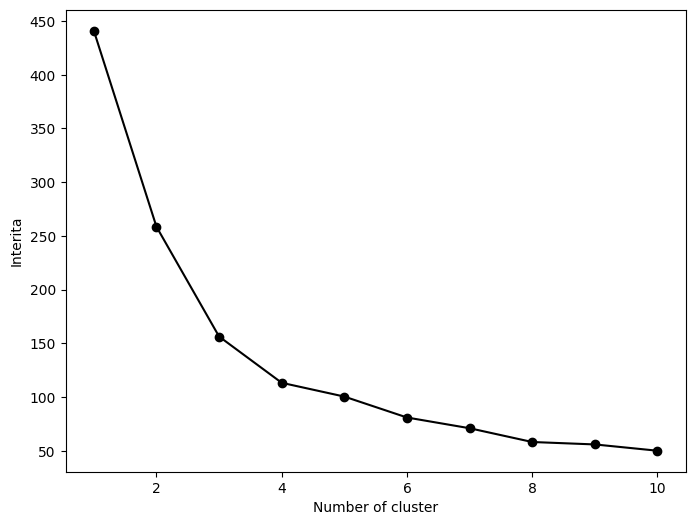

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

intertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    intertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K,intertia,'bo-',color = 'black')
plt.xlabel("Number of cluster")
plt.ylabel("Interita")



In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=4,random_state=42)
df_cleaned['Clusters'] = kmeans.fit_predict(x_scaled)
print(df_cleaned[['SALES','QUANTITYORDERED','PRICEEACH','Clusters']])

        SALES  QUANTITYORDERED  PRICEEACH  Clusters
10    3965.66               37     100.00         2
21    1451.00               20      72.55         0
40    4905.39               21     100.00         2
47    3944.70               30     100.00         2
51    2416.56               24     100.00         2
...       ...              ...        ...       ...
2667  3268.00               43      76.00         3
2673  1747.20               26      67.20         0
2685  5001.92               44     100.00         1
2764  4277.35               35     100.00         2
2791  2189.60               23      95.20         2

[147 rows x 4 columns]


/tmp/ipykernel_16634/3673655807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Clusters'] = kmeans.fit_predict(x_scaled)
